In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

1. ** Dataset:**
   - Using `make_classification` from scikit-learn to generate a synthetic dataset with the following characteristics:
     - `n_samples`: 10,000 samples
     - `n_features`: 2 features
     - `n_redundant`: 0 redundant features
     - `n_classes`: 2 classes
     - `flip_y`: 0 (no flipping of labels)
     - `n_clusters_per_class`: 2 clusters per class
     - `class_sep`: 0.79 separation between classes
     - `weights`: [0.99] weights for each class
     - `random_state`: 81 for reproducibility

In [3]:
def create_dataset():
    X, y = make_classification(n_samples = 10000,
                               n_features = 2,
                               n_redundant = 0,
                               n_classes = 2,
                               flip_y = 0,
                               n_clusters_per_class = 2,
                               class_sep = 0.79,
                               weights = [0.99],
                               random_state = 81)
    return pd.DataFrame(X, columns = ['feature_1', 'feature_2']), pd.Series(y)


In [4]:
def plot_dataset(X, y, label):
    print(y.value_counts())

    markers = {1: "X", 0: "v"}
    sns.scatterplot(data = X, x = 'feature_1', y = 'feature_2', hue = y, style = y, markers = markers)

    plt.title(label)
    plt.ylim(-5, 4)
    plt.xlim(-3, 3)

    plt.show()

0    9900
1     100
dtype: int64


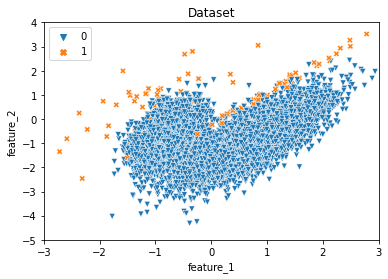

In [5]:
X, y = create_dataset()

plot_dataset(X, y, "Dataset")

## SMOTE :

SMOTE, which stands for Synthetic Minority Over-sampling Technique, is a technique used in the field of machine learning and data mining to address the class imbalance problem. The class imbalance problem occurs when one class in a classification problem has significantly fewer samples than the other class(es), leading to biased models that may not perform well on the minority class.

In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state = 0)

x_res, y_res = smote.fit_resample(X, y)

In [13]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 9900, 1: 9900})


0    9900
1    9900
dtype: int64


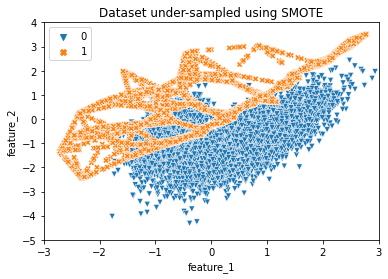

In [15]:
plot_dataset(x_res, y_res, 'Dataset under-sampled using SMOTE')